---
title: "Dimensionality Reduction"
format: html
---

# PCA

Principal component analysis is a method where we can transform high dimensional data into a lower-dimensional representation. The first principle component maximizes the variance in the data, and each subsequent principle component is orthogonal to the others. These components very quickly encapsulate all the data’s variability, as you will see that the first few principle components do most of the job in explaining the variance. Therefore, you can use PCA to see what variables are necessary and what variables you do not need as they are the most important patterns.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn import preprocessing
from statsmodels.multivariate.pca import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
record=pd.read_csv('data/RecordData.csv')
record=record.drop(['Year','RegionName'],axis=1)
record.head()

,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),"Some college, no degree",...,Mean Rent Paid,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,Typical Home Value
0,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,0.033732,...,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.047111,0.038688
1,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,1.429793,...,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0.036934,0.070360
2,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,0.007408,...,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,0.082710,0.263465
3,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,0.014854,...,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,-0.125037,0.076587
4,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,-0.065209,...,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.026241,0.005789


c:\Users\npeno\anaconda3\Lib\site-packages\statsmodels\multivariate\pca.py:563: EstimationWarning: Only 31 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  warnings.warn('Only {num:d} eigenvalues are positive.  '


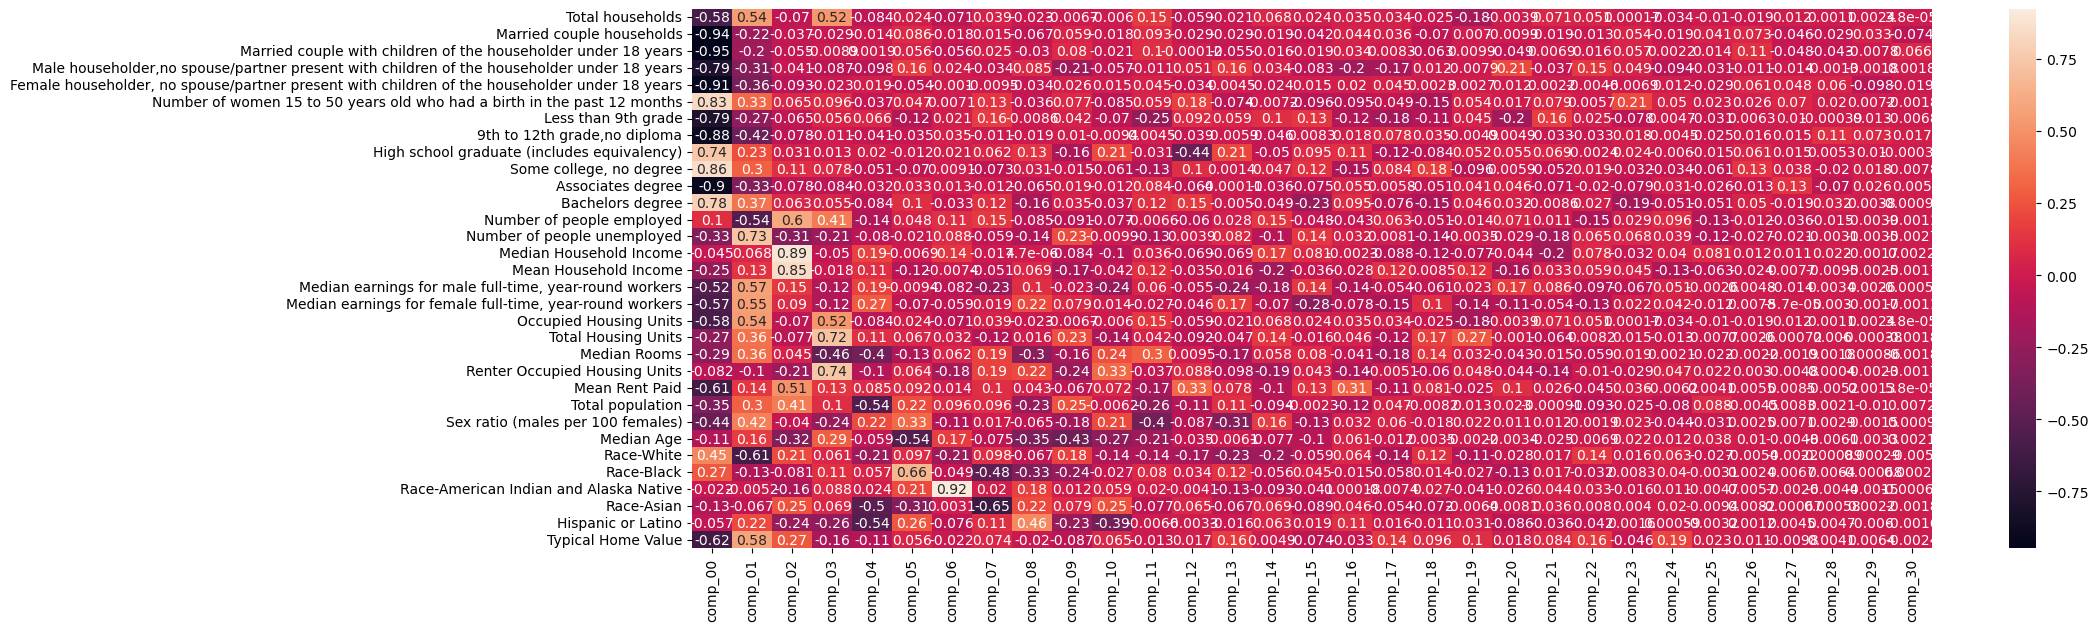

In [5]:
pca=PCA(record,standardize=True,method='eig')
components=pca.factors
loadings=pca.loadings
pcFeats=pd.concat([record,components],axis=1)
correlation=pcFeats.corr()
correlation=correlation[:-len(components.columns)].loc[:,'comp_00':]
fig,ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation,annot=True)
plt.show()

This shows us what features are correlated with the first principle component, and what features will change together. For example, there is a high negative correlation between the first principle component and percent change of married couple households and married couple households with children under 18 years old. So, you could say that as the percent change of married couple households decrease, so does the percent change of married couple households with children, which makes a lot of sense. There are definitely a lot if redundant variables in my data set.

In [6]:
print(loadings)

                                                     comp_00   comp_01  \
Total households                                   -0.175812  0.256873   
Married couple households                          -0.283751 -0.104949   
Married couple with children of the householder... -0.284422 -0.094214   
Male householder,no spouse/partner present with... -0.236433 -0.144831   
Female householder, no spouse/partner present w... -0.273693 -0.169895   
Number of women 15 to 50 years old who had a bi...  0.250620  0.157151   
Less than 9th grade                                -0.238491 -0.125836   
9th to 12th grade,no diploma                       -0.265389 -0.198263   
High school graduate (includes equivalency)         0.223171  0.110411   
Some college, no degree                             0.257255  0.140807   
Associates degree                                  -0.270666 -0.154192   
Bachelors degree                                    0.235542  0.177002   
Number of people employed             

The loadings tell us what features have the most impact on the principle componets. For example, the median rooms has the most information captured in the second principle component.For my analysis I will now attempt to determine the optimal number of principle components.

<Figure size 800x600 with 0 Axes>

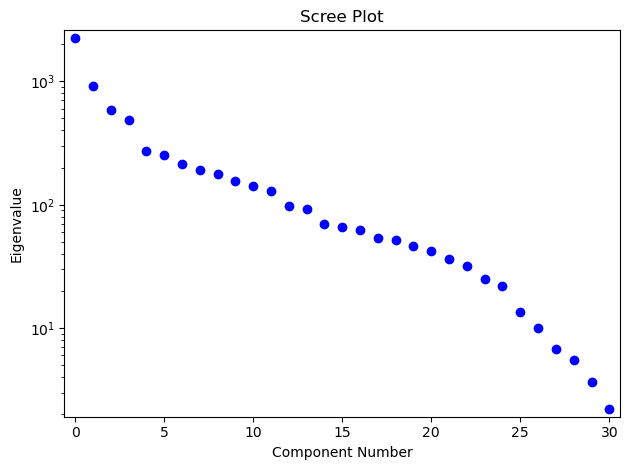

In [7]:
plt.figure(figsize=(8,6))
pca.plot_scree()
plt.show()

It is difficult to see the elbow here, but it seems like there may be an elbow at around 5 principle componenets.

In [8]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaler=StandardScaler()
scaled=scaler.fit_transform(record)
pca = PCA()
components = pca.fit_transform(scaled)

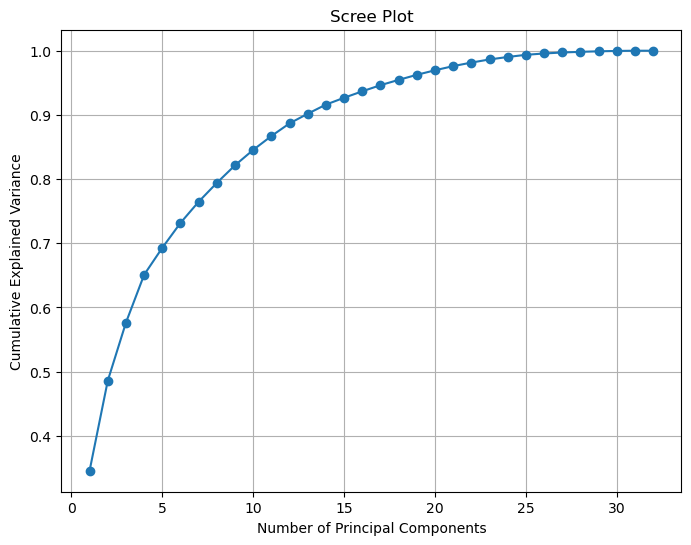

In [9]:
explainedVarianceRatio=pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explainedVarianceRatio) + 1), np.cumsum(explainedVarianceRatio), marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

We will go with 5 principle components

Here we will plot the first two principle components to see if it reveals anything.

In [57]:
pca = PCA(n_components=2)
result = pca.fit_transform(scaled)
resultdf=pd.DataFrame(data=result,columns=['PC1','PC2'])

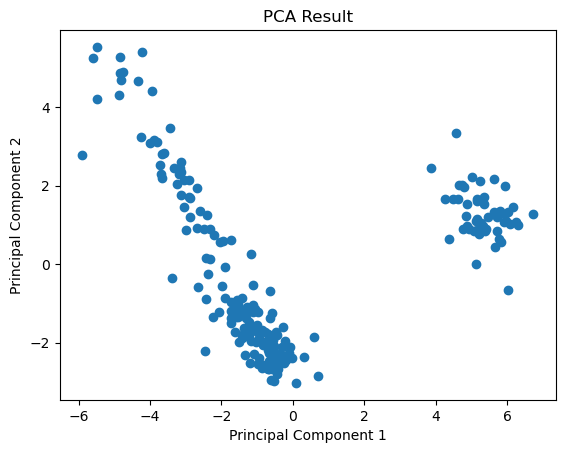

In [58]:
plt.scatter(resultdf['PC1'], resultdf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

This graph does not tell us much, but overall with PCA which features are highly correlated with what principle components and how many principle componenets are optimal, so ultimatley I can reduce the dimensions of my data so I can have more accurate analysis in the future.

I will continue my analysis as normal, but if I go back to improve my models, this PCA analysis will useful in helping me see what columns are not contributing to an accurate model.

# t-SNE

In t-Distributed Stochastic Neighbor Embedding, the key parameter is perplexity which affects the tradeoff between preserving local vs global structures. It aims to map similar datapoints together while keeping differrent data points apart.

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.001s...
[t-SNE] Computed neighbors for 204 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 2.276934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.974541
[t-SNE] KL divergence after 300 iterations: 0.267783


In [38]:
import plotly.express as px
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled)
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

In [39]:
fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', title='t-SNE')
fig.show()

# Evaluation and Comparison


PCA utilizes a linear approach, preserving the overall structure of data but may encounter challenges with non-linear relationships and sensitivity to outliers. It is computationally efficient and interpretable, making it well-suited for handling substantial datasets. It is better for data sets with a large number of features, over 50 is commonly used benchmark.

t-SNE is a non-linear technique that excels in capturing local structures and intricate patterns. However, it comes with increased computational demands and sensitivity to hyperparameters. T-SNE is better tailored for smaller datasets.

I would say for my data, PCA is a better method that more easily allows me to see what features I should drop from my analysis, but overall the visulizations produced from both methods show some clustering that reveals reduncincy in my variables.